In [1]:
#Here I am importing necessary libraries for the smooth execution of project. Some libraries like matplotlib and seaborn 
#are used for visualization (eg, graphs, box-plot, etc.)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd

In [2]:
#Reading the csv file through pandas library

df = pd.read_csv('wine-data-set .csv')
df.head(40)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [3]:
#here I am getting to know the count of missing values and the type of data I have

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6463 entries, 0 to 6462
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  quality               6463 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 606.0 KB


In [4]:
#Here I am geting the mean, standard deviation of the variables.

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
#Displaying uniqe values of quality variable

df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [6]:
Z = df.drop(columns=['quality'])
y = df['quality']

In [7]:
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test).round(3) * 100)

In [8]:
bottomline_model = LogisticRegression()
classify(bottomline_model, Z, y)

Accuracy: 45.7


Here the bottom line accuracy for the LogisticRegression Model is almost 46%.

As we know the values of total sulfur dioxide variable is huge in comparison to other variables. Let's apply a logarithmic 
tranformation.

In [9]:
df_1 = df.drop(columns=['quality'])
df_1_quality = df['quality']

df_1['total sulfur dioxide'] = np.log(df_1['total sulfur dioxide'])
model_1 = LogisticRegression()
classify(model_1, df_1, df_1_quality)

Accuracy: 51.1


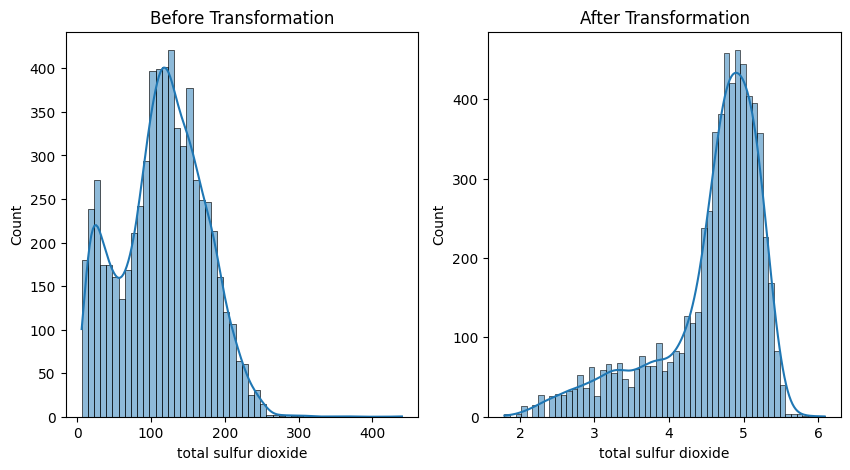

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))  
sns.histplot(data=df, x="total sulfur dioxide", kde=True, ax=axes[0])  
axes[0].set_title('Before Transformation')
sns.histplot(data=df_1, x="total sulfur dioxide", kde=True, ax=axes[1])
axes[1].set_title('After Transformation')
plt.show()

Here it is clearly seen that the accuracy of the model has improved signifcantly. The graph indicates the range of the values has signifcantly reduced, improving the balance between variables.

Let's apply same tranformation to free sulfur dioxide.

In [11]:
df_2 = df.drop(columns=['quality'])
df_2_quality = df['quality']

df_2['free sulfur dioxide'] = np.log(df_2['free sulfur dioxide'])
model_2 = LogisticRegression()
classify(model_2, df_2, df_2_quality)

Accuracy: 45.7


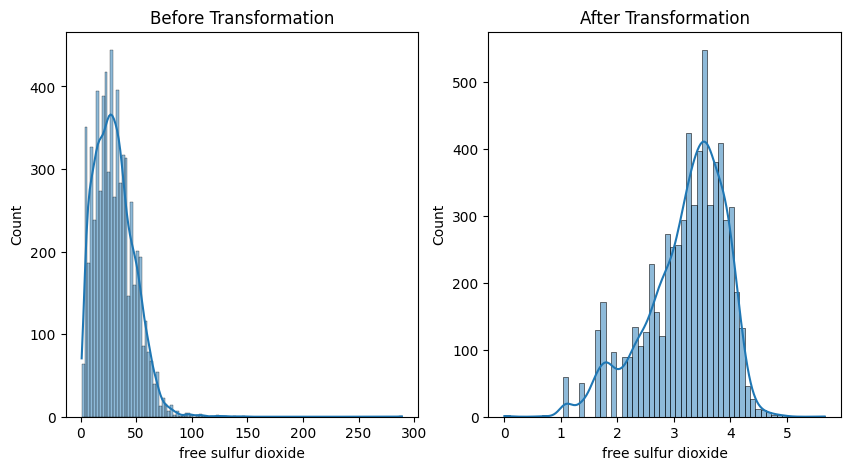

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))  
sns.histplot(data=df, x="free sulfur dioxide", kde=True, ax=axes[0])  
axes[0].set_title('Before Transformation')
sns.histplot(data=df_2, x="free sulfur dioxide", kde=True, ax=axes[1])
axes[1].set_title('After Transformation')
plt.show()

Here it is clearly seen that the accuracy of the model has almost similar to bottomline model and it is less than model_1. However the data looks more normalized after the tranformation.

Let's apply Min Max Scaler to fixed acidity and density to normalize the value between 0 and 1.

In [13]:
df_3 = df.drop(columns=['quality'])
df_3_quality = df['quality']

scaler = MinMaxScaler();
df_3['fixed acidity'] = scaler.fit_transform(df_3['fixed acidity'].values.reshape(-1,1))
model_3 = LogisticRegression()
classify(model_3, df_3, df_3_quality)

Accuracy: 48.5


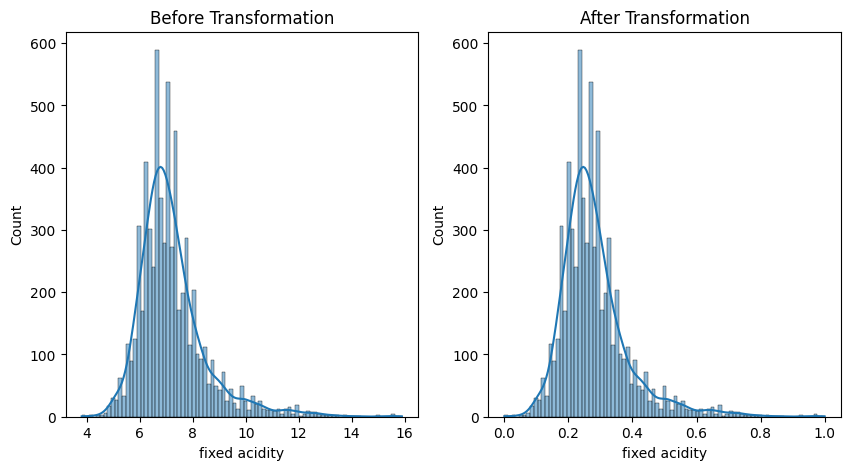

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))  
sns.histplot(data=df, x="fixed acidity", kde=True, ax=axes[0])  
axes[0].set_title('Before Transformation')
sns.histplot(data=df_3, x="fixed acidity", kde=True, ax=axes[1])
axes[1].set_title('After Transformation')
plt.show()

Here, the accuracy is slighlty better than model_2 but still less than model_1. Though, the distribution looks same after the tranformation, however the balance between the variables has increased as the value stands now between 0 and 1.

In [15]:
df_4 = df.drop(columns=['quality'])
df_4_quality = df['quality']

scaler = MinMaxScaler();
df_4['density'] = scaler.fit_transform(df_4['density'].values.reshape(-1,1))
model_4 = LogisticRegression()
classify(model_4, df_4, df_4_quality)

Accuracy: 45.4


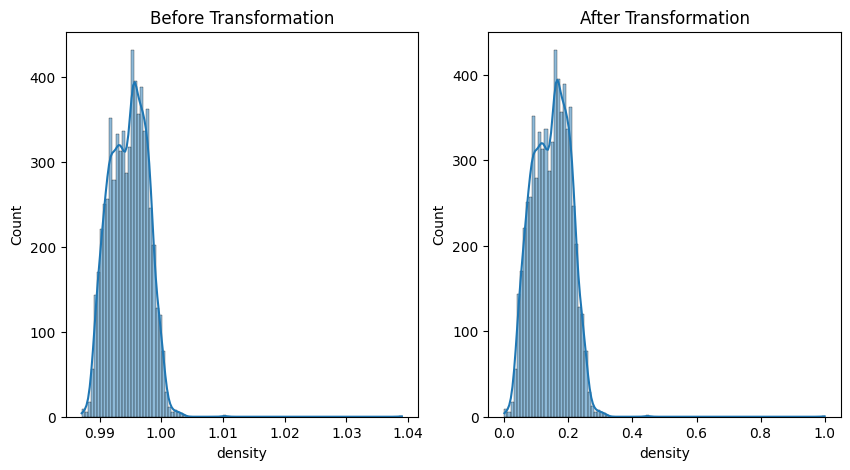

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))  
sns.histplot(data=df, x="density", kde=True, ax=axes[0])  
axes[0].set_title('Before Transformation')
sns.histplot(data=df_4, x="density", kde=True, ax=axes[1])
axes[1].set_title('After Transformation')
plt.show()

Here, it can be seen that the accuracy of model_4 is almost same as of bottomline model.

As we can see in the model_1 the range of values after lograrithmic operation are still more than the most of the features. Let's keep the range between 0 and 1 using above operation and see the accuracy.

In [17]:
df_5 = df.drop(columns=['quality'])
df_5_quality = df['quality']

scaler = MinMaxScaler();
df_5['total sulfur dioxide'] = scaler.fit_transform(df_5['total sulfur dioxide'].values.reshape(-1,1))
model_5 = LogisticRegression()
classify(model_5, df_5, df_5_quality)

Accuracy: 50.9


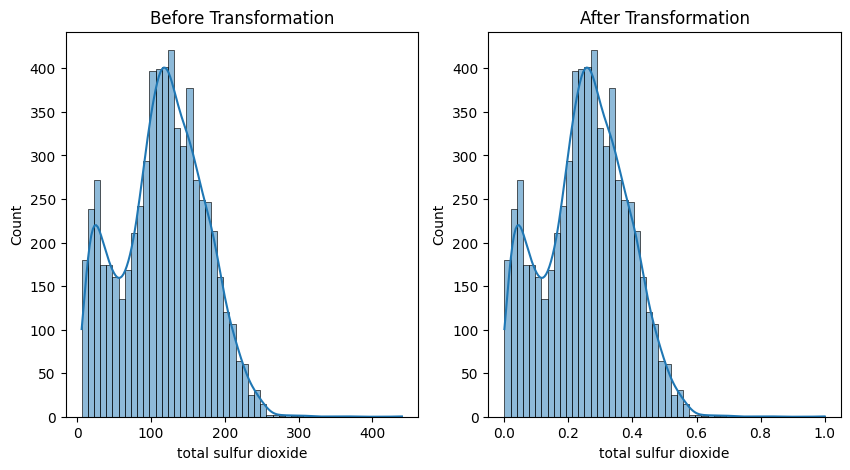

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))  
sns.histplot(data=df, x="total sulfur dioxide", kde=True, ax=axes[0])  
axes[0].set_title('Before Transformation')
sns.histplot(data=df_5, x="total sulfur dioxide", kde=True, ax=axes[1])
axes[1].set_title('After Transformation')
plt.show()

Hence, it can be seen the accuracy has improved gradually after normalzing the range of total sulfur dioxide. From all the above operation, it can be seen that the accuracy has improved significantly from the bottom line model after applying different feature techniques. However, the above transformations signify that values in total sulfur dioxide columns are highly impacting the model as tranforming this column increase the accuracy to 50%.

Let's move towards Feature Selection

From the previous feature transformation process, we clearly see that total sulfur dioxide variable is affectling the model highly. So, I am dropping it as a first variable.

In [19]:
df_6 = df.drop(columns=['quality','total sulfur dioxide'])
df_6_quality = df['quality']

model_6 = LogisticRegression()
classify(model_6, df_6, df_6_quality)

Accuracy: 50.4


The model_6 has performed significantly, though the same as feature transformation on total sulfur dioxide.

Let's have box plot of residual sugar.

<Axes: ylabel='residual sugar'>

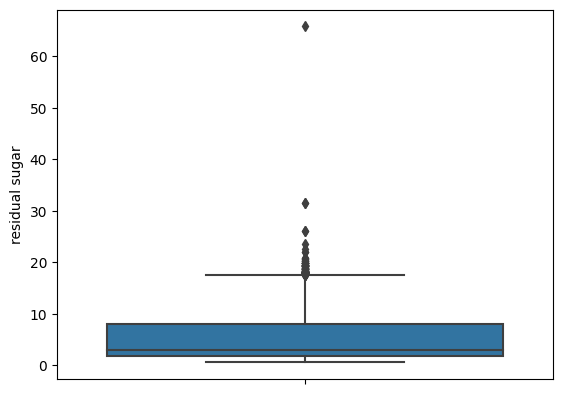

In [20]:
sns.boxplot(y=df['residual sugar'], data=df)

It can be clearly seen there is a outlier here. Let's remove residual sugar column ans see if there is any improvements in the model.

In [21]:
df_7 = df.drop(columns=['quality','residual sugar'])
df_7_quality = df['quality']

model_7 = LogisticRegression()
classify(model_7, df_7, df_7_quality)

Accuracy: 47.0


As you can see the accuracy has improved.

Let's now remove both total sulfur dioxide and residual sugar.

In [22]:
df_8 = df.drop(columns=['quality','residual sugar','total sulfur dioxide'])
df_8_quality = df['quality']

model_8 = LogisticRegression()
classify(model_8, df_8, df_8_quality)

Accuracy: 51.7


Here, the accuracy has improved and it is more than dropping the columns residual sugar, total sulfur dioxide individually.

I already have a variable indicating fixed acidity and hence the variabe such as volatile acidity and citric acid can be dropped.

In [23]:
df_9 = df.drop(columns=['quality','volatile acidity','citric acid'])
df_9_quality = df['quality']

model_9 = LogisticRegression()
classify(model_9, df_9, df_9_quality)

Accuracy: 45.4


The accuracy is still same as of bottom line model. Now, in the similar way drop the fixed acidity variable and keep the volatile acidity and citric acid.

In [24]:
df_10 = df.drop(columns=['quality','fixed acidity'])
df_10_quality = df['quality']

model_10 = LogisticRegression()
classify(model_10, df_10, df_10_quality)

Accuracy: 47.8


Here the accuracy is slightly better than dropping volatile acidity and citric acid columns individually.

In conclusion, it can be seen that the model has performed efficently when there is a transformation on the total sulfur dioxide variable, or is it being dropped. The reason being the range of this variable vary highly that other variables and hence, creating imbalance between the variables. Furthermore, normalizing the variables between 0 and 1 has also postitively impacted the model's accuracy. Moreover, dropping the variables such as citric acid and volatile acid has also not impacted the model's performace. This can be of because there is already a variable named fixed acidity indicating the acidity contents of the wine and therefore, making other two variables indicating the acid content irrelevant.